## 1. 
Consider the Diagram below
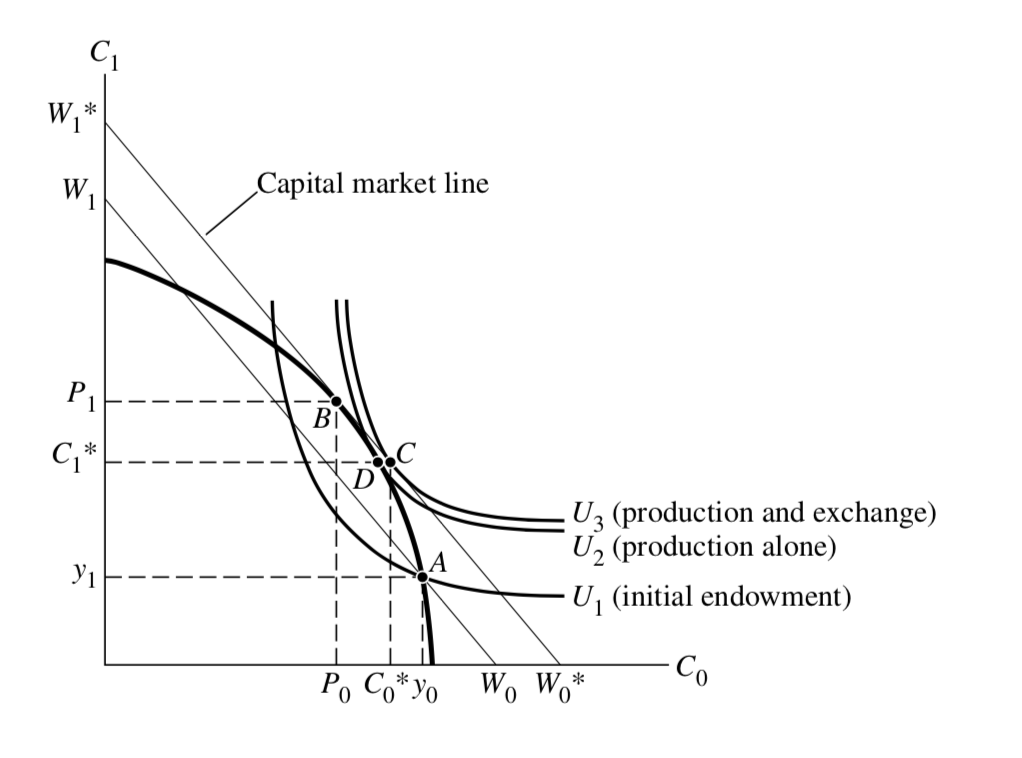

and suppose that the production function may be characterised by the equation 

$C_1=1-C_0^2$ for $0\le C_0\le 1$ (0 elsewhere) and the borrowing/lending
rate is $r=10\%$.   
### a.  
Find the coordinates of point B on the graph, and the equation of the line
connecting points $W_1^*$ and $W_0^*$.

In [1]:
using JuMP, HiGHS, Ipopt, SymEngine,Plots;

In [2]:
r = 0.1
m = -(1+r)
B_x = -m/2
B_y = 1-B_x^2
B_coords = [B_x B_y]
print("Co-ordinates of point B: ", B_coords)

Co-ordinates of point B: [0.55 0.6975]

In [3]:
# Calculate equation of line using y-y1 = m(x-x1)
function C1(x)
    m*(x.-B_coords[1]).+B_coords[2]
end

W1 = C1(0)
[m, W1]'

1×2 adjoint(::Vector{Float64}) with eltype Float64:
 -1.1  1.3025

-----------------
Slope of the line connecting point $W_1^*$ to $W_0^*$ is given by:

$C_1 = -1.1 C_0+1.3025$

-----------------
### b. 
If Indifference curves are of the form $C_0 C_1=Const$ find the coordinates of
point C.

In [4]:
D=Model(Ipopt.Optimizer)
@variable(D,c0>=0)
@variable(D,c1>=0)
@constraint(D,c0^2+c1==1)
@NLobjective(D,Max,c0*c1)
set_silent(D)
optimize!(D)
D_coords=[value.(c0) value.(c1)]
print("Co-ordinates of point D: ", D_coords)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Co-ordinates of point D: [0.5773502691907862 0.6666666666653909]

In [5]:
# Point C has same C1-value as point D. Solve for C0
function C0(x)
    -(x-1.3025)/1.1
end

C_coords = [C0(2/3), D_coords[2]]'

1×2 adjoint(::Vector{Float64}) with eltype Float64:
 0.57803  0.666667

---------------------
### c.
If initial endowment is located at point A, and $y_0=0.8$, how much does this individual
need to invest and/or borrow/lend in order to achieve point C?

In [6]:
Y0 = 0.8
inv = Y0-(C_coords[2]-W1)/m
print("Amount of Investment required: ", inv)

Amount of Investment required: 0.22196969696853708

## 2.
Run the following code to generate and graph simulated CAPM data

In [7]:
using Statistics, StatsBase, Plots, GLM, DataFrames, CSV, Random

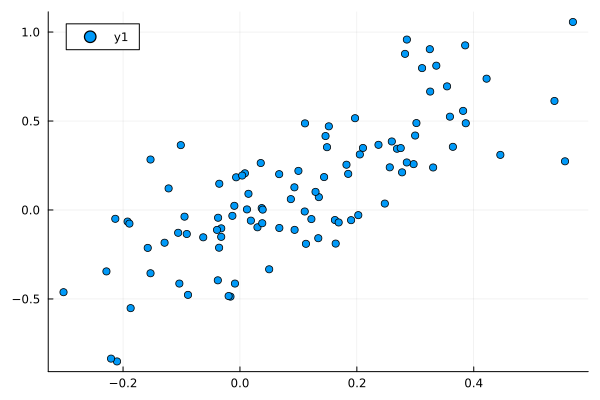

In [8]:
Random.seed!(18308483) # Set random seed for reproducibility
Rmarket=.1 .+randn(100)*.2  # Generate Market Returns with mean 0.1 and sd 0.2
Rmystock=.04 .+1.5*(Rmarket.-.04)+randn(100)*.25  # Generate CAPM with Beta=1.5 and nonmarket Risk .25
scatter(Rmarket, Rmystock,legend=:topleft)

In [9]:
simdata=DataFrame(Rmarket=Rmarket,Rmystock=Rmystock);

Using the simulated data, estimmate and interpret the Beta and line of best fit.
If you wish, you may do this assignment in another programming language, but you must
generate the data in a similar way to the above

In [10]:
ols = lm(@formula(Rmystock ~ Rmarket), simdata)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Rmystock ~ 1 + Rmarket

Coefficients:
───────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)   Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)  -0.0411117   0.0281359  -1.46    0.1472  -0.0969464   0.014723
Rmarket       1.51457     0.128274   11.81    <1e-19   1.26002     1.76913
───────────────────────────────────────────────────────────────────────────

----------------------------------------------------
We see from the OLS output that the Rmarket coefficient is statistically significant and very close to the true value of 1.5. The coefficient is postive implying that investors are rewarded for taking on additional risk with higher excess returns, & the value of 1.5146 implies that for each unit of additional risk, investors receive 1.5146 units of additional excess return. 

We see that the intercept term (corresponding to the risk-free rate of 4%) is not significant at th 5% level. This implies that our intercept term is not significantly different from 0. This is strange as we know that from the underlying data that we should have a intercept of 4%. This is likely due to the relatively high non-market risk present in our data (25%) as well as the relatively small sample of returns data (100).

---------------
## 3.
Download the Fama French data (FF_stock_data.zip) and load the data into Julia using the template in the Notebook (asst2_ff_q.ipynb) provided.  
In a manner similar to class (also demonstrated in the Notebook), fit and interpret the Fama French 3-factor model on Rtn as a function of the other factors for 2 Equities of your choice (there are about 80 to choose from).
If you wish to complete this using another package, the data is easily loadable as a .csv file

In [11]:
ff=CSV.read("Z:/Users/Gavin/Downloads/FF_stock_data/FF_stock_data.csv",DataFrame);
rename!(ff,"Mkt-RF" => "Mkt_net");

In [12]:
ff[1:5,[40,59]]

,IBM_Close,ORCL_Close
,Float64,Float64
1,-0.0339439,-0.0883598
2,0.0351366,-0.0528149
3,-0.0172413,-0.0588235
4,-0.00438597,0.0768229
5,0.0396476,0.11971


In [13]:
lm(@formula(ORCL_Close~Mkt_net+HML+SMB),ff)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

ORCL_Close ~ 1 + Mkt_net + HML + SMB

Coefficients:
────────────────────────────────────────────────────────────────────────────────────
                    Coef.   Std. Error       t  Pr(>|t|)     Lower 95%     Upper 95%
────────────────────────────────────────────────────────────────────────────────────
(Intercept)   0.000165246  0.00024458     0.68    0.4993  -0.000314224   0.000644716
Mkt_net       0.012083     0.000195504   61.80    <1e-99   0.0116997     0.0124662
HML          -0.00446439   0.000313232  -14.25    <1e-44  -0.00507844   -0.00385034
SMB          -0.00157219   0.000389404   -4.04    <1e-04  -0.00233557   -0.000808809
────────────────────────────────────────────────────────────────────────────────────

--------------
From the Linear Model output we see that each of the 3 factors; the Market Factor, High Minus Low, Small Minus Big; are all statistically significant.

The market return factor is positive, indicating that Oracle's return is positively correlated with that of the market. Therefore Oracle tends to perform well in a growing market, but perform poorly when market returns are poor. This factor has the largest value, indicating that it is the primary factor in the model driving the performance of the stock.

The High Minus Low factor is negative, indicating that the Oracle stock tends to behave like a low book-to-market/low value stock relative to other stocks on the market. This would indicate that Oracle is a growth stock, rather than a value stock. When low BTM stocks perform well we would expect Oracle to perform well, whereas when high BTM stocks perform well we would expect Oracle to perform relatively poorly. The coeffiecient has a value which is relatively close to 0, meaning this factor does not have as big an impact on returns as the market return factor does.

The Small Minus Big factor is also negative, indicating that Oracle's returns behave like that of a high market cap company. We would expect Oracle to perform relatively well when high market cap stocks do well, and perform poorly when low market cap stocks do well. This coefficient has the smallest value indicating it is not a key driver of the returns of Oracle.

In [14]:
lm(@formula(IBM_Close~Mkt_net+HML+SMB),ff)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

IBM_Close ~ 1 + Mkt_net + HML + SMB

Coefficients:
──────────────────────────────────────────────────────────────────────────────────
                   Coef.   Std. Error      t  Pr(>|t|)     Lower 95%     Upper 95%
──────────────────────────────────────────────────────────────────────────────────
(Intercept)  -6.09538e-5  0.000167304  -0.36    0.7156  -0.000388932   0.000267025
Mkt_net       0.00853494  0.000133733  63.82    <1e-99   0.00827277    0.00879711
HML          -6.59029e-6  0.000214265  -0.03    0.9755  -0.00042663    0.00041345
SMB          -0.00152278  0.000266369  -5.72    <1e-07  -0.00204497   -0.0010006
──────────────────────────────────────────────────────────────────────────────────

-----------------
From the Linear Model output we see that 2 of the 3 factors; the Market Factor & Small Minus Big; are statistically significant, while the High Minus Low factor is not statistically significant.

The market return factor is positive, indicating that IBM's return is positively correlated with that of the market. IBM tends to perform well in a growing market, but perform poorly when overall market returns are poor. This factor has the largest value of those under consideration in the model, indicating that it is the primary factor driving the performance of the stock.

The High Minus Low factor is not statistically significant from 0, indicating that the High Minus Low factor has no effect on the performance of IBM's returns.

The Small Minus Big factor is negative, indicating that IBM's returns behave like that of a large market cap company. We would expect IBM to perform relatively well in a market where high market cap stocks do well, and perform poorly in a market where low market cap stocks do well.